In [1]:
%pylab inline
import pandas as pd
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
subj_list = [304,305,306,307,308,309,345,362,330,363,388,3106,3107,310,361,356,3101,3102,399,3122,364,318,352,393,346,3110,397,343,337,3123,312,3120,3112,311,331,396,313,3124,340,374,335,3113,3119,342,3125,3100,3114,366,365,385,327,3108,353,368,326,360,336,314,3117,382,325,390,398,391,334,380,3118,3105,378,386,358,324,3116,317,392,3103,384,3121,354,3115,341,350,377,369,348,394,3111,379,3126,3127,3128,3129,315,319,321,323,328,332,333,339,347,349,351,355,357,367,370,372,373,381,383,387,395,3104,3109]
#subj_list = [371,375] # problematic

In [3]:
for i in tqdm(subj_list):
    #print(i)
    df  = pd.read_csv (f"/Volumes/project/NSFMath/Main/Behavioral_Task_Data/Computer_tasks//s{i}/para_Sub{i}_Estimation_1.csv")
    df1 = pd.read_csv (f"/Volumes/project/NSFMath/Main/Behavioral_Task_Data/Computer_tasks//s{i}/Sub{i}_Estimation_1.csv")
    df2 = pd.read_csv (f"/Volumes/project/NSFMath/Main/Behavioral_Task_Data/Computer_tasks//s{i}/Sub{i}_Estimation_2.csv")

    df = df.to_numpy()
    alpha = df[0,2]
    beta = df[0,3]

    estimation_combined = df1.append(df2, ignore_index=True, sort=False)

    pic_id = estimation_combined ['picID']

    estimation_combined ['dot_quantity'] = pic_id.apply(lambda x: int(x.split('_')[2]))#everyting out of str is str, so need to change to integer
    #estimation_combined ['Response']=estimation_combined ['Response'].apply(lambda x : int(x[:-3]) if type(x)==str and ('+' in x) else int(x))
    #import pdb;pdb.set_trace()
    estimation_combined ['residual'] =estimation_combined ['Response']- alpha*estimation_combined['dot_quantity']**beta


    estimation_combined.to_csv(f"/Volumes/project/NSFMath/Main/Behavioral_Task_Data/Computer_tasks//s{i}/s{i}_estimation_combined_residual.csv",index = False)

100%|██████████| 115/115 [01:38<00:00,  1.17it/s]


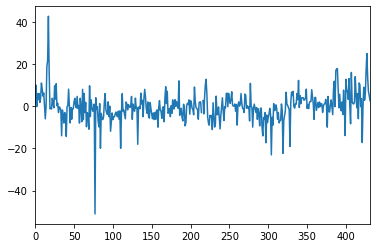

In [4]:
estimation_combined ['residual'].plot()

## Find extreme alpha and beta, then plug in the estimation function, then adjust all the trials. 081620

In [6]:
results = []
for i in tqdm(subj_list):
    df4  = pd.read_csv (f"/Volumes/project/NSFMath/Main/Behavioral_Task_Data/Computer_tasks//s{i}/para_Sub{i}_Estimation_1.csv")
    df4 = df4.to_numpy()
    alpha = df4[0,2]
    beta = df4 [0,3]
    
    results_dict = {'SubjID': i, 'alpha': alpha, 'beta': beta}
    
    results.append(results_dict)

100%|██████████| 115/115 [00:30<00:00,  3.79it/s]


In [7]:
data_resutls = pd.DataFrame(results)
data_resutls.to_csv ('/Volumes/project/NSFMath/Main/Behavioral_Task_Data/Computer_tasks/all_subjs_alpha_beta.csv',index = False)

## Take extreme case s3110 for example

In [37]:
sub_lst = [367]
alpha = 6.47
beta = 0.58

In [38]:
for i in sub_lst:
    df_raw = pd.read_csv (f"/Volumes/project/NSFMath/Main/Behavioral_Task_Data/Computer_tasks//s{i}/Sub{i}_comparison_corrected.csv")
    
    df_dot = df_raw.loc[df_raw['Condition']!=2]
    
    pic_id_1 = df_dot ['img1']
    info1 = pic_id_1.apply(lambda x: x.split('/')[-1])
    
    info1_quan = info1.apply(lambda x: int(x.split('_')[-2]))
    info1_sym = info1.apply(lambda x: True if ('S'in x) else False)
    
    df_dot['dot_quan_1'] = info1_quan
    df_dot.loc[info1_sym == False, 'dot_quan_1'] = alpha*df_dot.loc[info1_sym == False, 'dot_quan_1']**beta
    
# picture #2

    pic_id_2 = df_dot ['img2']
    info2 = pic_id_2.apply(lambda x: x.split('/')[-1])
    
    info2_quan = info2.apply(lambda x: int(x.split('_')[-2]))
    info2_sym = info2.apply(lambda x: True if ('S'in x) else False)
    
    df_dot['dot_quan_2'] = info2_quan
    df_dot.loc[info2_sym == False, 'dot_quan_2'] = alpha*df_dot.loc[info2_sym == False, 'dot_quan_2']**beta
    
    df_dot['ratio_adjusted'] = df_dot['dot_quan_1']/df['dot_quan_2']
    
    df_dot['ratio_adjusted'] = df_dot['ratio_adjusted'].apply(lambda x: 1/x if x<1 else x)
  

/Users/xueyingren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/xueyingren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [36]:
df_dot.to_csv('/Desktop/s367_adjust.csv', index = False)

,Unnamed: 0,TrialID,img1,img2,Response,RT,Condition,Correct_Answer,Ratio,dot_quan_1,dot_quan_2
1,1,109,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,2,6.777073,1,1,2,54.165375,40.872086
2,2,55,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,2,2.960639,4,2,3,34.000000,72.844041
3,3,96,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,1,1.957288,1,2,3,50.022115,72.844041
5,5,64,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,1,1.227579,4,1,2,23.000000,29.899129
7,7,76,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,1,1.215825,4,1,4,75.000000,50.022115
...,...,...,...,...,...,...,...,...,...,...,...
154,154,83,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,2,0.628634,1,2,1,29.899129,35.692862
155,155,75,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,2,0.862882,4,1,4,75.000000,50.022115
157,157,74,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,2,1.161694,4,1,4,31.000000,29.899129
158,158,103,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,/Users/taylorcasteel/Desktop/Adult_NSFMath_Mai...,2,0.631313,1,1,2,39.875526,29.899129


In [25]:
info1

1        39_0.1.png
2      S_34_0.1.png
3        34_0.2.png
5      S_23_0.2.png
7      S_75_0.2.png
           ...     
154      14_0.1.png
155    S_75_0.1.png
157    S_31_0.2.png
158      23_0.1.png
159      43_0.2.png
Name: img1, Length: 120, dtype: object

In [40]:
df['dot_quan_1']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices